# COGS 108 - Final Project 

# Overview

The Kickstarter Website is a crowdfunding platform. Crowdfunding platforms allow users to raise money and typically provide backer rewards or pre-order products. For example a filmmaker may offer a digital copy film, a live viewing of premier, signed posters, etc. A tech company could be offering pre-orders of their new phone cases or other product. Kickstarter does make efforts to ensure you keep your promises to backers and fraud charges could be made if you can't deliver or use funds improperly. Kickstarter is primarily aimed at artists and entrepreneurs. We consider this website is based on the perspectives of all-or-nothing, because the funds from backers to creators cannot be charged unless the project reaches their goals. 

We found this dataset is interesting because of the following reasons:
- Kickstarter funding have done by creators and backers, and they are not based on profits consideration for each other; backers do the funding for creators if they think their projects seemed successful or beneficial.
- We can observe the data while considering the reasons why one projects went successful on funding but the other did not; There should be some factors having a correlation with successful ones and failed ones. 
- This dataset has quite a lot of columns that we could make many researches, although we are not going through all of the possible research.


# Names

- Karen Rodriguez Pinto
- Enlin Wei
- Yumi Minami 
- Kanami Hannah Tanaka
- Alan Willey
- Yuxiao Fan

# Group Members IDs

- A15161856
- A12938737
- A12669124
- A14714448
- A15746309
- A14778609

# Research Question

The research questions we proposed were:
- Which category/subcategory is the most successful/ the least according to the funding success result? 
- Which year was the most successful? Is there any causes that one year was superior to another? We would consider some economic impacts as one of the factors.
- Which quarter in one year is the most effective or active for funding for each category?
- Does the name length affects the funding outcome? 


-----if a coding member has time, please work on this too---- so Hannah can have many more things to write about.
- Is there any correlation between the excessive amount (the amount by usd_pledged minus their own goal) and the year? What about the excessive amount and the category? 


## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


music and films are famous for any age ranges, generations, and gender


*Fill in your hypotheses here*

# Dataset(s)

- Dataset Name: Kickstarter Campaigns
- Link to the dataset: https://www.kaggle.com/yashkantharia/kickstarter-campaigns
- Number of observations: 192548

This dataset contains information about Kickstarter crowdfunding campaigns from 2014 to February 2019. The information includes the names, currency, main and subcategories, launch date and deadlines, goal amount of money to raise and actual amounts raised, whether the campaign was successful or failed, and geographical locations of the campaigns (country and state).

# Setup

In [1]:
# imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import datetime as dt

In [2]:
# loads Kickstarters data into dataframe
df_kickstarters = pd.read_csv("Kickstarter_projects_Feb19.csv")

In [3]:
# viewing the first rows of the dataframe
df_kickstarters.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


# Data Cleaning

Since different countries may provide confounding variables, we decided we will look only at data from the US. We will first take the subset of US-based kickstarters only.

In [4]:
df_kickstarters = df_kickstarters[df_kickstarters['country']=='US']

We checked to see that the country and the currency are both US-only after the drop.

In [5]:
df_kickstarters.country.unique()

array(['US'], dtype=object)

In [6]:
df_kickstarters.currency.unique()

array(['USD'], dtype=object)

We then checked to see if any cell has null values, and if so to drop those entries.

In [7]:
df_kickstarters[df_kickstarters.isnull().any(axis=1)]

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged


We found no null values in the dataset, and so we proceeded with data cleaning.

We first dropped the column 'id' since it gives no useful information, just an ID associated with the project. We then dropped columns 'start_month' and 'end_month' since the information about the start and end months of the projects are already given in the dates in the 'launched_at' and 'deadline' columns and so is redundant. We checked to see that the country and currency are all US-based, so it would not be necessary to keep those columns.

In [8]:
df_kickstarters.drop(columns=['id', 'start_month', 'end_month', 'country', 'currency'], inplace=True)

We then noticed that the **launched_at** and **deadline** columns contained dates and times of when the projects were launched and ended in string format. It would be easier to work with datetime objects, so we replaced the strings with datetime objects.

In [9]:
# method to convert datetime strings in 'df_kickstarters' into datetime objects
def to_datetime(datetime_str):
    return dt.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

In [10]:
# converts all datetime strings in df to datetime objects
df_kickstarters['launched_at'] = df_kickstarters['launched_at'].apply(to_datetime)
df_kickstarters['deadline'] = df_kickstarters['deadline'].apply(to_datetime)

Finally, we noticed some of the monetary amounts have more than 2 decimal places, which should be cleaned up since we don't work with monetary amounts more specific than 2 decimal places. So we decided to round the amounts to 2 decimal places.

In [11]:
df_kickstarters['goal_usd'] = df_kickstarters['goal_usd'].round(2)
df_kickstarters['usd_pledged'] = df_kickstarters['usd_pledged'].round(2)

# Data Analysis & Results

Since our project aims to analyze which factor is most important for the success of kickstarters, we will divide the dataframe into two separate ones, one with all the successful projects and one with all the failed projects.

In [12]:
# divides df_kickstarters into successful and failed ones
df_successful = df_kickstarters[df_kickstarters['status']=='successful']
df_failed = df_kickstarters[df_kickstarters['status']=='failed']

In [13]:
# views number of successful and failed kickstarters
print("Number of successful kickstarters: " + str(len(df_successful))); print("Number of failed kickstarters: " + str(len(df_failed)))

Number of successful kickstarters: 85473
Number of failed kickstarters: 52372


It seems that there are different numbers of successful and failed kickstarters; we will account for that by comparing the ratio of each category in the successful versus failed kickstarters.

"\nf = plt.figure();\ndf2 = df.groupby([ 'lecture_attendance','gender'])['lecture_attendance'].count().unstack('gender').fillna(0)\nsub_df2 = np.transpose(df2.div(df2.sum()))\nsub_df2.plot(kind='bar', stacked=True, rot=0)\n"

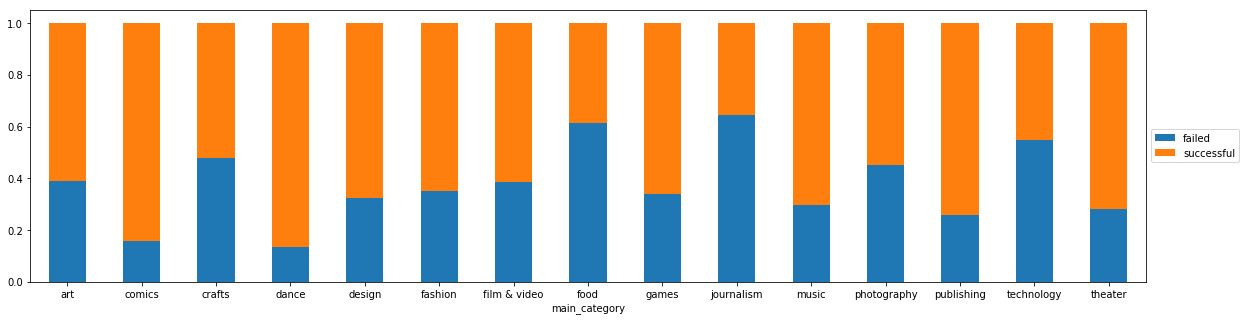

In [14]:
df_categories = df_kickstarters.groupby(['status','main_category'])['status'].count().unstack('main_category').fillna(0)
sub_df_categories = np.transpose(df_categories.div(df_categories.sum()))
sub_df_categories.plot(kind='bar',stacked=True,rot=0,figsize=(20,5))

plt.legend(('failed','successful'), loc='center left', bbox_to_anchor=(1.0, 0.5))

"""
f = plt.figure();
df2 = df.groupby([ 'lecture_attendance','gender'])['lecture_attendance'].count().unstack('gender').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))
sub_df2.plot(kind='bar', stacked=True, rot=0)
"""

In [15]:
# views first rows of df_kickstarters
df_kickstarters.head()

,name,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,blurb_length,name_length,status,start_Q,end_Q,usd_pledged
0,Socks of Speed and Socks of Elvenkind,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.0,Menasha,WI,14,7,successful,Q4,Q4,6061.0
2,"Live Printing with SX8: ""Squeegee Pulp Up""",fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.0,Manhattan,NY,21,7,successful,Q2,Q3,1110.0
3,Lost Dog Street Band's Next Album,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.0,Nashville,TN,15,6,successful,Q3,Q4,4807.0
4,"Qto-X, a Tiny Lantern",technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.0,Troy,MI,15,4,successful,Q4,Q1,40368.0
5,"Aaron McDonnell EP ""Follow""",music,Country & Folk,2014-01-22 18:21:37,2014-02-21 18:21:37,30.0,7500.0,Seattle,WA,11,4,successful,Q1,Q1,7770.0


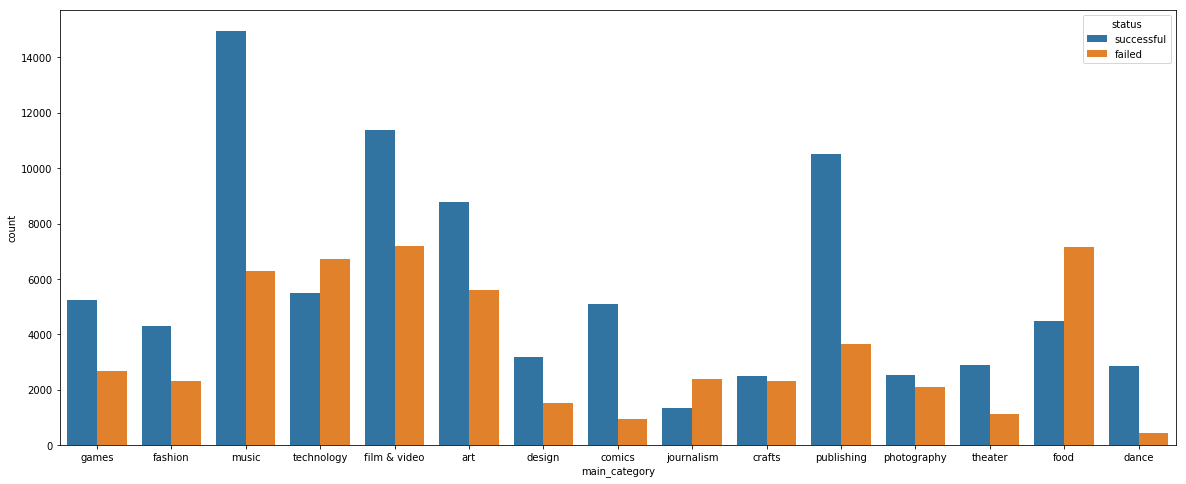

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(x='main_category',hue='status',data=df_kickstarters)

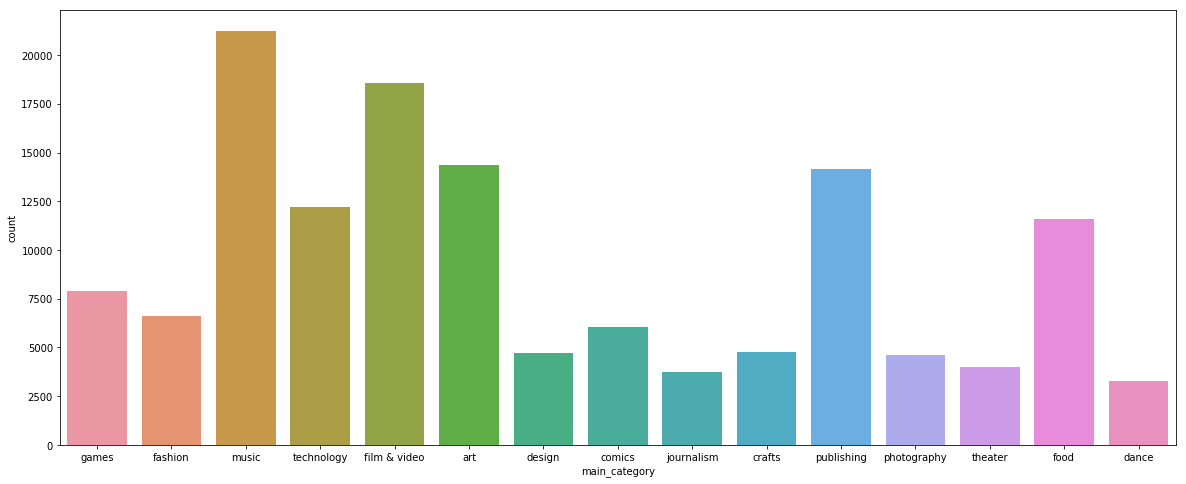

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(x='main_category',data=df_kickstarters)

In [18]:
outcome,predictors = patsy.dmatrices('status ~ main_category',df_kickstarters)
mod = sm.OLS(outcome,predictors)
res = mod.fit()

In [19]:
# this is throwing a "not aligned" error
# res.summary()

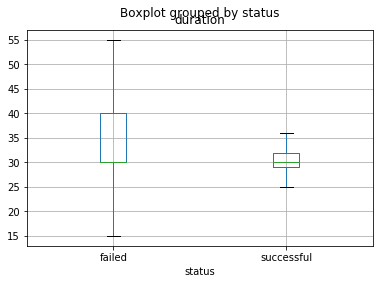

In [20]:
df_kickstarters.boxplot(column=['duration'],by='status',showfliers=False)

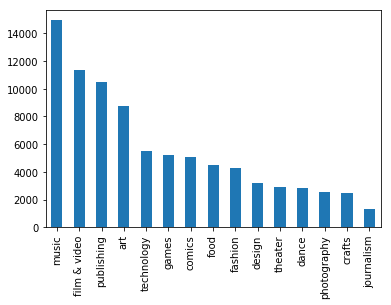

In [21]:
# plots histogram of column 'main category' of successful projects
df_successful['main_category'].value_counts().plot(kind='bar')

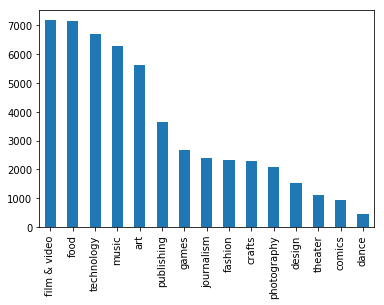

In [22]:
# plots histogram of column 'main category' of failed projects
df_failed['main_category'].value_counts().plot(kind='bar')

In [24]:
ttest_ind(df_successful['duration'],df_failed['duration'])

Ttest_indResult(statistic=-57.82736669344242, pvalue=0.0)

In [25]:
normaltest(df_successful['duration'])

NormaltestResult(statistic=17320.316404308724, pvalue=0.0)

In [26]:
normaltest(df_failed['duration'])

NormaltestResult(statistic=5619.857786730017, pvalue=0.0)

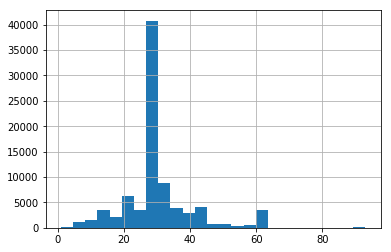

In [28]:
df_successful['duration'].hist(bins=25)

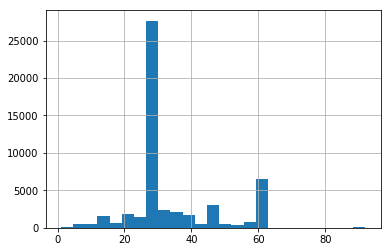

In [29]:
df_failed['duration'].hist(bins=25)

In [23]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*